The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("Dataset/Algerian_forest_fires_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


#### Data Cleaning

In [5]:
#check missing values
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


**Observation:** 
- data divide into  two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- 122 instances for each region.
- Only 3 rows with null values 

**Action**
- We will create column "Region" with value ('Bejaia'=0and'Sidi Bel-abbes'=1)
- delete rows

In [7]:
df.loc[:122,"Region"] = 0
df.loc[123:,"Region"] = 1

In [8]:
df = df.dropna().reset_index()

In [9]:
df.isna().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
# droping index
df = df.drop('index',axis=1).reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [13]:
df = df.drop(122).reset_index(drop=True)

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
#Remove extra space in column names
df.columns = [col.strip() for col in df.columns]

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### change data type as required

In [18]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [20]:
objects = [col for col in df.columns if df[col].dtype == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
for object in objects:
    if object != "Classes":
        df[object] = df[object].astype(float) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### EDA

In [24]:
df_copy = df

In [25]:
df_copy = df_copy.drop(['day','month','year'],axis=1)

In [26]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [27]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [28]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [29]:
df_copy['Classes'] = np.where(df_copy['Classes'] == "not fire",0,1)

In [30]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

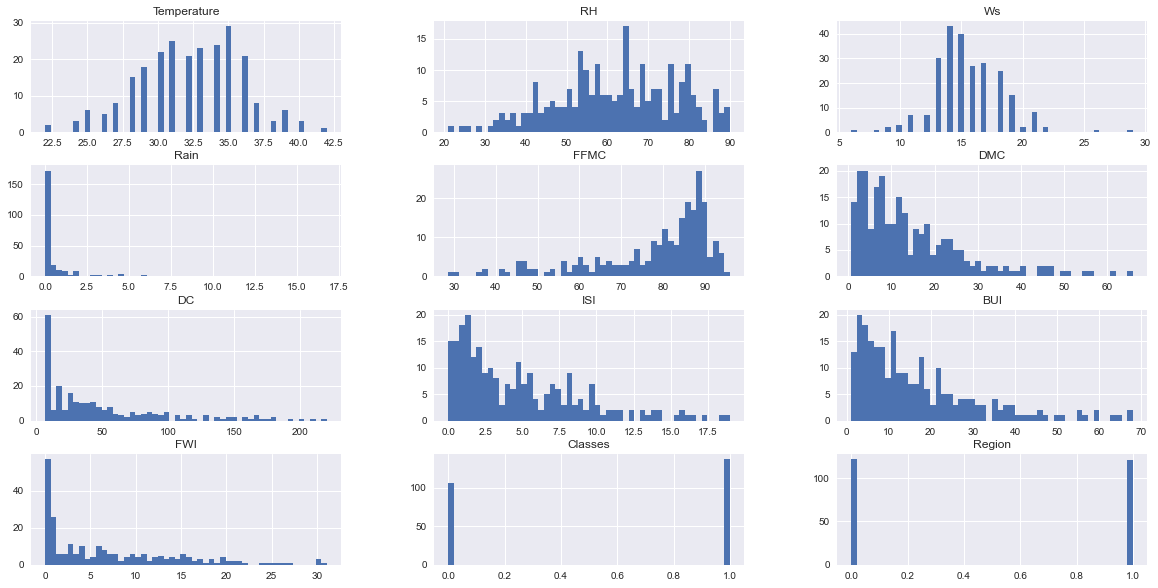

In [31]:
plt.style.use('seaborn')
df_copy.hist(bins = 50,figsize=(20,10))
plt.show()

<AxesSubplot:>

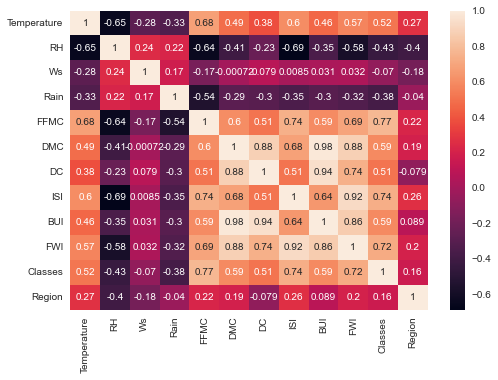

In [32]:
sns.heatmap(df_copy.corr(),annot=True)

<AxesSubplot:xlabel='FWI'>

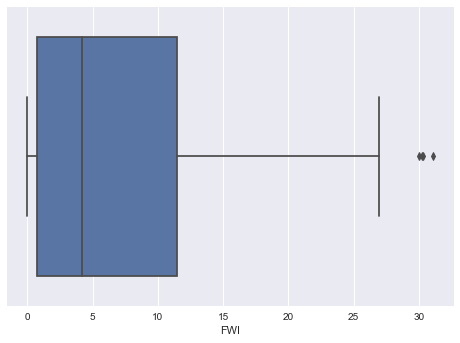

In [33]:
sns.boxplot(df['FWI'])

<AxesSubplot:xlabel='month', ylabel='count'>

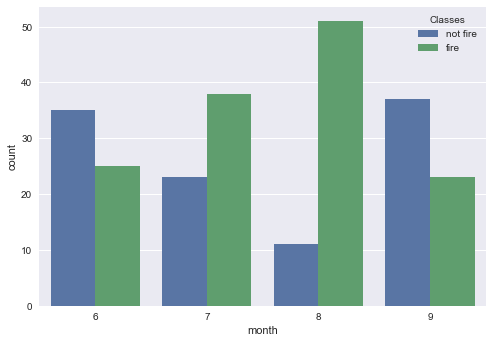

In [42]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),"not fire","fire")
sns.countplot(x='month',hue='Classes',data=df)

In [44]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [47]:
df.drop(['day','month','year'],axis=1, inplace = True)

In [51]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [59]:
def get_highly_correlated_columns(df, threshold=0.8):
    """
    Gets the column names of features in the DataFrame that are highly correlated with each other based on a given threshold.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The correlation threshold. Features with correlation higher than this value will be selected.
    
    Returns:
    list: A list of column names that are highly correlated.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Select upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop


In [65]:
feature_drop = get_highly_correlated_columns(X_train,0.85)

In [67]:
X_train.drop(feature_drop,axis=1,inplace=True)
X_test.drop(feature_drop,axis=1,inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 score 0.9840551267182641


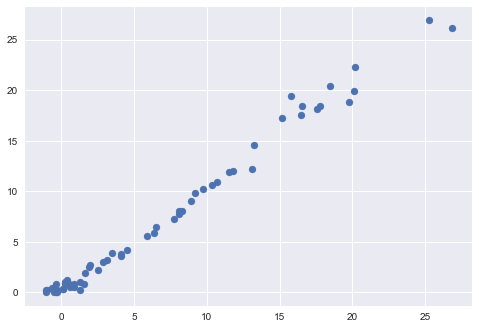

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.9169163394821118


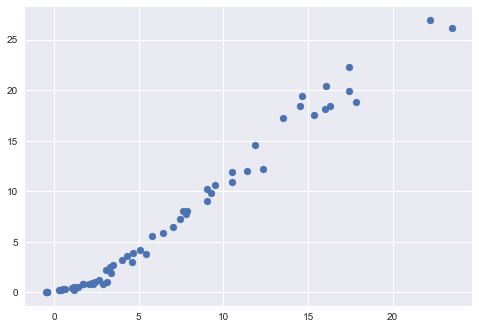

In [75]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.9835685866711208


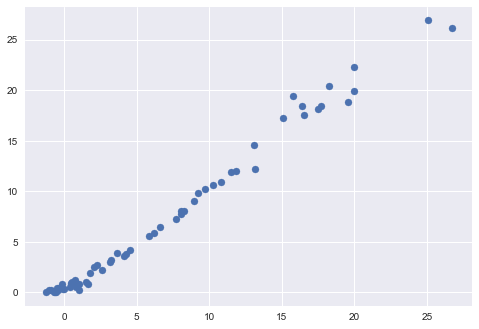

In [79]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
lassoCV = LassoCV()
lassoCV.fit(X_train,y_train)
y_pred = lassoCV.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.983561758338579


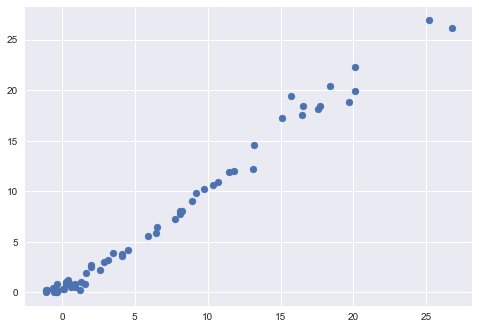

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.9835617583385791


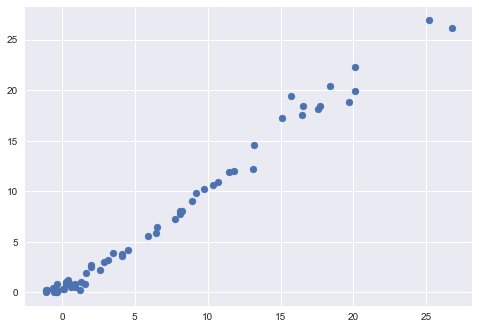

In [80]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
ridgeCV = RidgeCV()
ridgeCV.fit(X_train,y_train)
y_pred = ridgeCV.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.7975838234494929


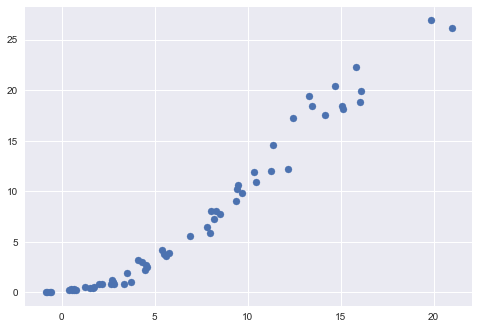

In [82]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)

R2 score 0.9822699022136941


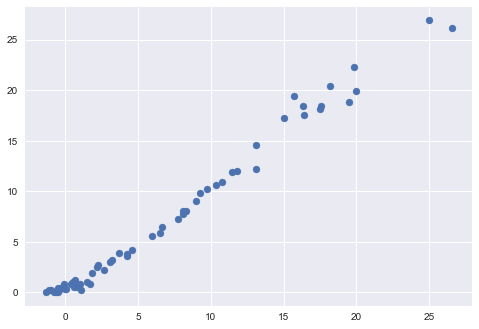

In [81]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
elasticCV = ElasticNetCV()
elasticCV.fit(X_train,y_train)
y_pred = elasticCV.predict(X_test)
score =r2_score(y_pred,y_test)
print("R2 score",score)
plt.scatter(y_pred,y_test)